In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/A/gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [5]:
df.shape

(3803, 23)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3677 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   float6

In [9]:
df.duplicated().sum()

0

In [10]:
# first coulumn property_type
df['property_type'].unique()

array(['flat', 'house'], dtype=object)

<Axes: xlabel='property_type'>

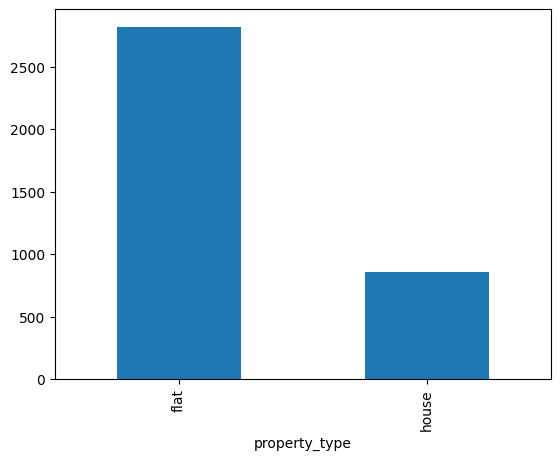

In [12]:
df['property_type'].value_counts().plot(kind='bar')

**Society**

In [13]:
df['society'].value_counts().shape

(676,)

In [14]:
df['society'].value_counts()

,count
society,
independent,486
tulip violet,75
ss the leaf,73
dlf new town heights,42
shapoorji pallonji joyville gurugram,42
...,...
dlf gardencity enclave,1
nitin vihar,1
landmark the residency,1


In [15]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023511
ss the leaf,0.046395
shapoorji pallonji joyville gurugram,0.059561
dlf new town heights,0.072727
signature global park,0.083699
...,...
ramsons kshitij,0.490282
umang monsoon breeze,0.494357
ats kocoon,0.498433


In [16]:
society_count = df['society'].value_counts()

In [23]:
society_count = df['society'].value_counts()
society_count
frequency_bins = {
    "very high(>100)":(society_count>100).sum(),
    "High (50-100)":((society_count>=50) & (society_count<=100)).sum(),
    "Medium (10-49)":((society_count>=10) & (society_count<=50)).sum(),
    "Low (2-9)":((society_count>1) & (society_count<=10)).sum(),
    "Very Low (1)":(society_count==1).sum()

}
frequency_bins

{'very high(>100)': 1,
 'High (50-100)': 2,
 'Medium (10-49)': 92,
 'Low (2-9)': 279,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

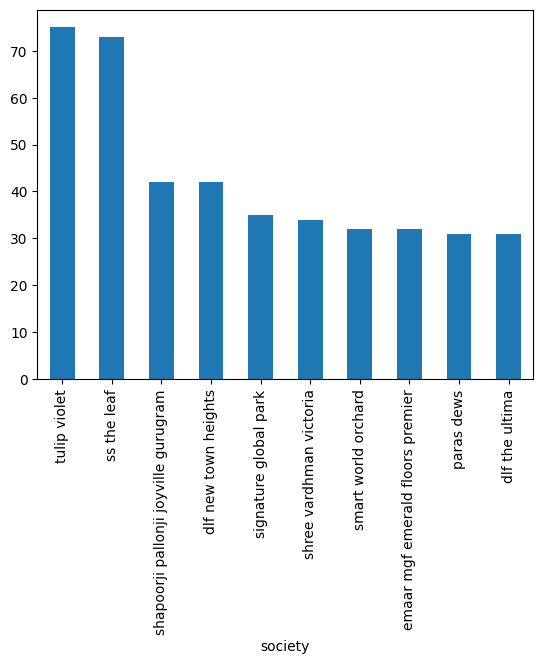

In [24]:
# top 10 socities
df[df['society'] !='independent']['society'].value_counts().head(10).plot(kind='bar')

In [25]:
df['society'].isnull().sum()

1

In [26]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


# Observation


*   around 13% property comes under independnt tag
* There are 675 societies
* 1 Missing value   





**Sector**

In [27]:
df['sector'].value_counts()

,count
sector,
sohna road,166
sector 85,108
sector 102,107
sector 92,100
sector 69,93
...,...
sector 30,5
sector 80,5
sector 73,3


<Axes: xlabel='sector'>

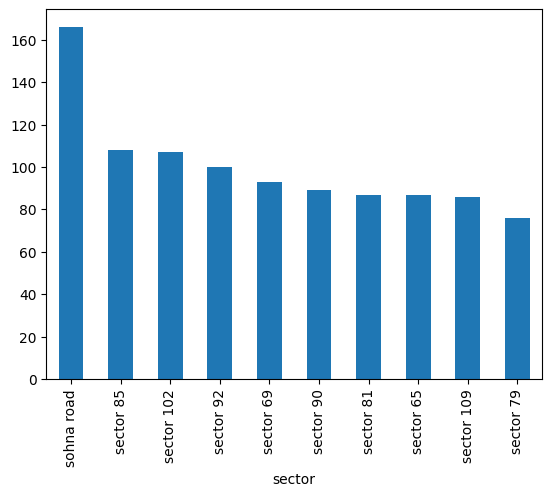

In [29]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [30]:
# frequency distribution for sector
sector_count = df['sector'].value_counts()

In [33]:
sector_frequency_bin = {
    'very_high(>100)': (sector_count>100).sum(),
    'High (50-100)': ((sector_count>=50) & (sector_count<=100)).sum(),
    'Average(10-40)': ((sector_count>=10) & (sector_count<=50)).sum(),
    'Low (2-9)': ((sector_count>1) & (sector_count<=10)).sum(),
    'Very Low (1)': (sector_count==1).sum()
}
sector_frequency_bin

{'very_high(>100)': 3,
 'High (50-100)': 25,
 'Average(10-40)': 62,
 'Low (2-9)': 18,
 'Very Low (1)': 0}

# observation #


*   There 104 unique sectors in dataset.
*   Frequency distribution of sectors.
     *   Very_High(>100): 3 sectors have more the  100 lsiting.
     * High(50-100): 25 secotrs have between 50 to 100 listing.
     * average(10-40): most of the property fall under this condition.
     * low(2-9): 16  secotor have netween 2-9 listing.
     * very low(1): there is no secotr with 1 listing.







**Price**


In [34]:
df['price'].describe()

,price
count,3660.000000
mean,2.533664
std,2.980623
min,0.070000
25%,0.950000
50%,1.520000
75%,2.750000
max,31.500000


In [37]:
df['price'].isnull().sum()

17

<Axes: xlabel='price', ylabel='Count'>

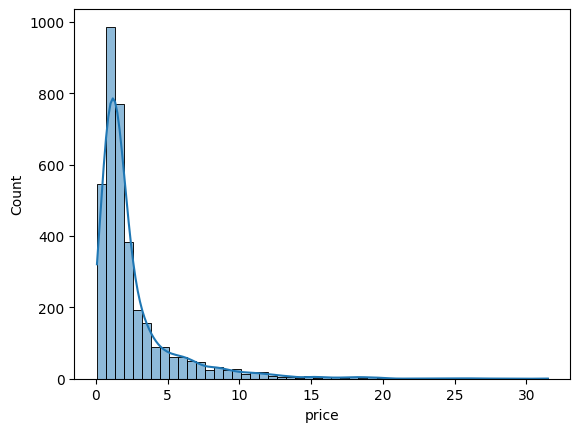

In [38]:
sns.histplot(df['price'], kde = True, bins = 50)

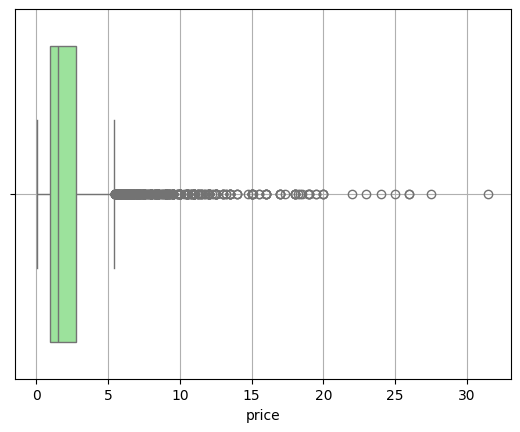

In [39]:
sns.boxplot(x = df['price'], color= 'lightgreen')
plt.grid()

## Descriptive statistic ##


  *   count: there is 3660 no-missing entries.
  * mean_price: the avg price is aprox 2.53
  * median price: the median or 50th percentile price is 1.5 crores.
  *STD: the price has std 2.9 which reprenst the variablitiy in the price.
  * Range : 0.7 - 31.5 crores.


## Visualization: ##
   

  *   distribution: the most property price in lowrer range between 1to 5 crores.
  *Box Plot: The Box plot show the spread of the data and potential outlier.
  
* missing valus: there is 17 missing values.





In [43]:
# skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(f'skewness: {skewness}')
print(f'kurtosis: {kurtosis}')

skewness: 3.2791704733134623
kurtosis: 14.933372629214258


In [45]:
# quantile analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.75, 0.95,0.1])
quantiles

,price
0.01,0.25
0.05,0.37
0.75,2.75
0.95,8.50
0.10,0.50


In [46]:
#identify potential outliers using QR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [47]:
IQR

1.8

In [48]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [49]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [52]:
outliers.shape

(425, 23)

In [54]:
outliers['price'].describe()

,price
count,425.000000
mean,9.235624
std,4.065259
min,5.460000
25%,6.460000
50%,8.000000
75%,10.750000
max,31.500000


## Outlier analysis ##
  * base on iqr method there is 425 propertie as outloiers.
  * these outliers have avergare price 9.2 crores.
  * The range of these outlier is from 5,46 to 31 crores.

<Axes: xlabel='price'>

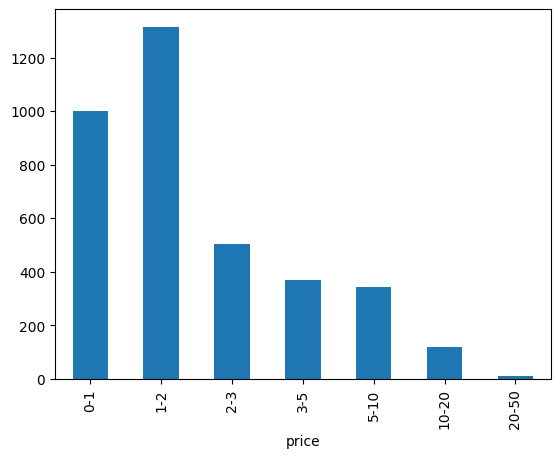

In [56]:
#price binning
bin = [0,1,2,3,5,10,20, 50]
bin_label = ['0-1','1-2','2-3','3-5','5-10','10-20', '20-50']
pd.cut(df['price'], bins = bin, labels = bin_label, right=False).value_counts().sort_index().plot(kind='bar')

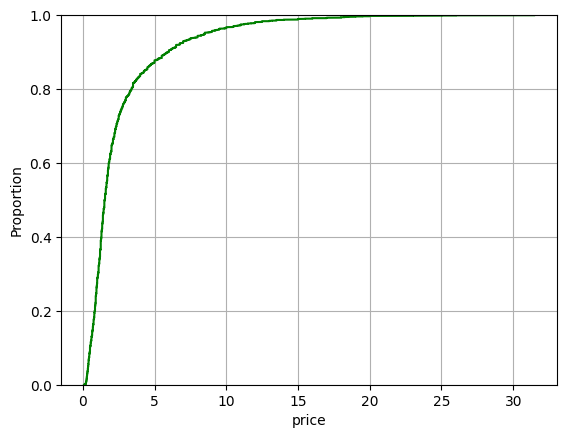

In [58]:
#ecdf plot
ecdf = sns.ecdfplot(df['price'], color='green')
plt.grid()

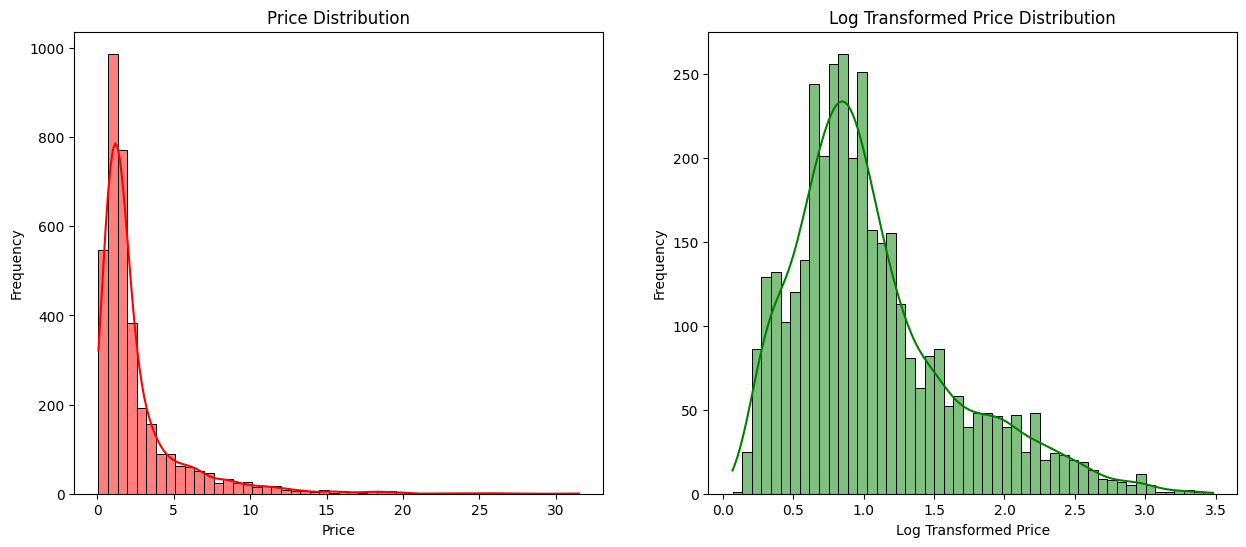

In [61]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df['price'], kde = True, bins = 50, color='red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
# distribution with log transform
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde = True, bins = 50, color='green')
plt.title('Log Transformed Price Distribution')
plt.xlabel('Log Transformed Price')
plt.ylabel('Frequency')
plt.show()

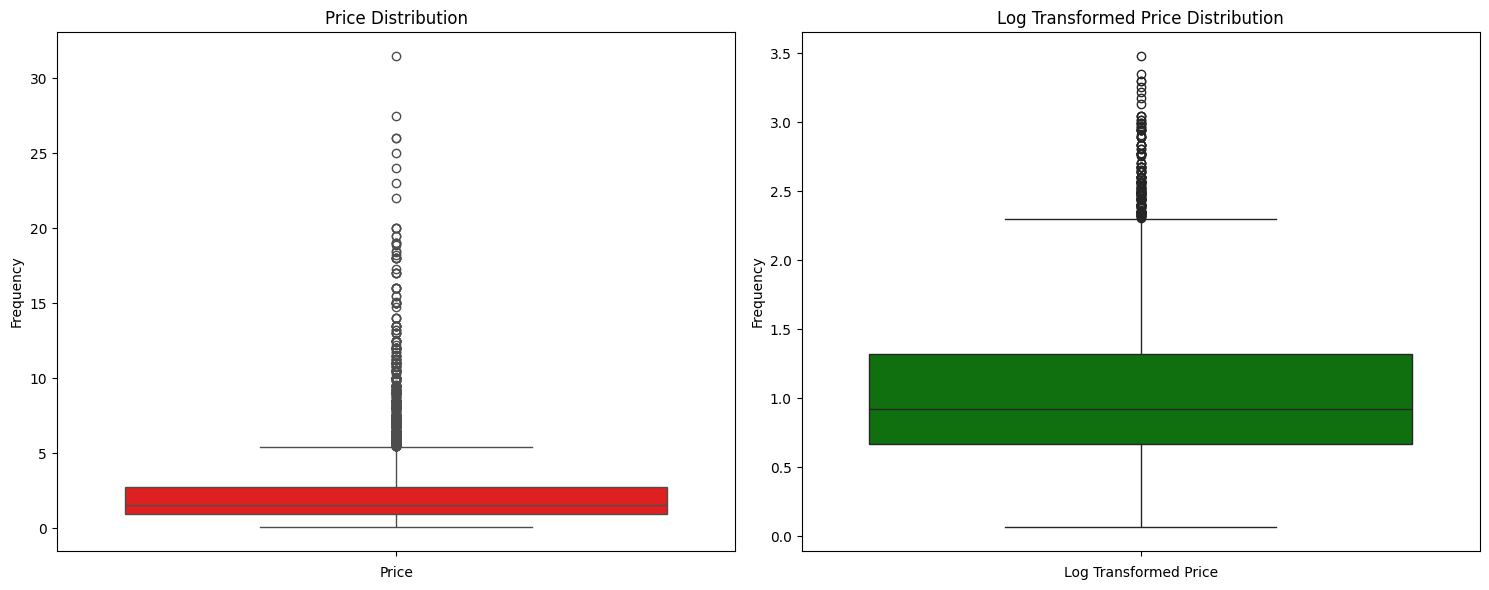

In [64]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.boxplot(df['price'], color='red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
# distribution with log transform
plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']), color='green')
plt.title('Log Transformed Price Distribution')
plt.xlabel('Log Transformed Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Price_per_sqft**

In [66]:
df['price_per_sqft'].isnull().sum()

17

In [67]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3660.000000
mean,13892.668306
std,23210.067190
min,4.000000
25%,6817.250000
50%,9020.000000
75%,13880.500000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

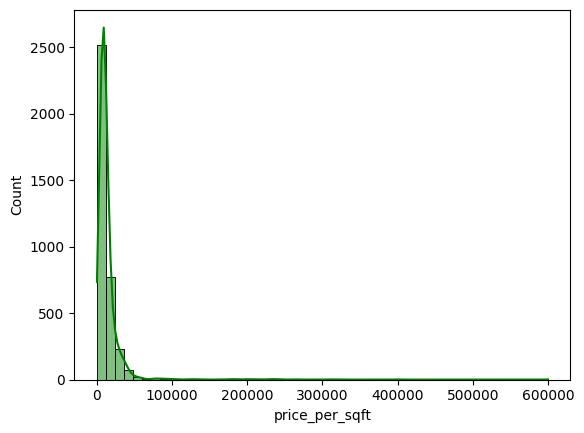

In [69]:
sns.histplot(df['price_per_sqft'],bins = 50, color = 'green', kde = True)

The box plot clerly shows some big outliers in the data sp we can not sent this data dierct to predict the price.


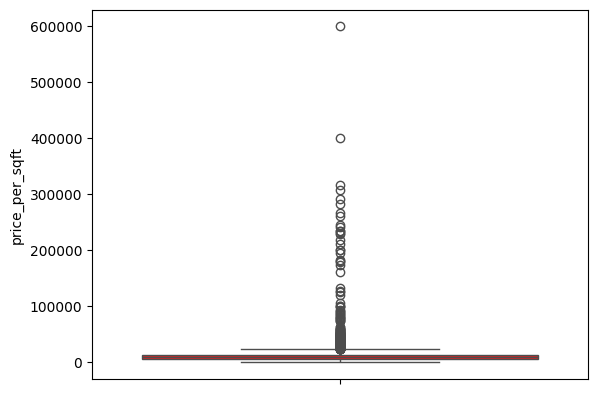

In [71]:
sns.boxplot(df['price_per_sqft'],color='red')
print("The box plot clerly shows some big outliers in the data sp we can not sent this data dierct to predict the price.")

## Bedrooms ##
  

In [75]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

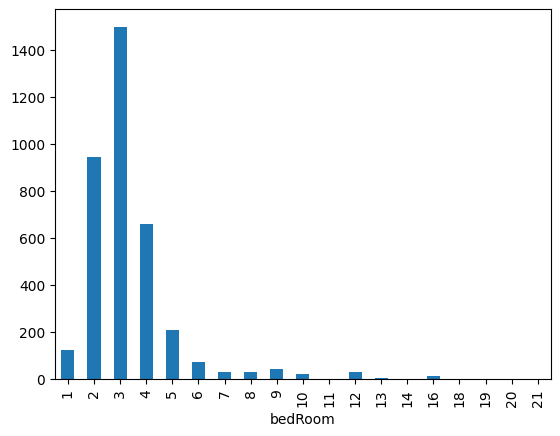

In [76]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

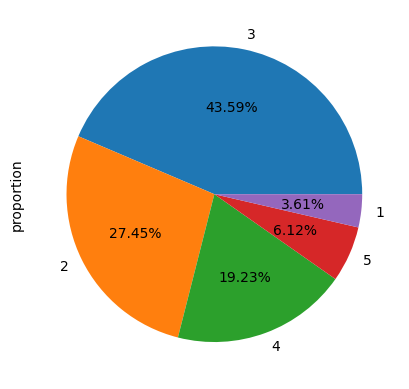

In [84]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## BathRooms##

In [86]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

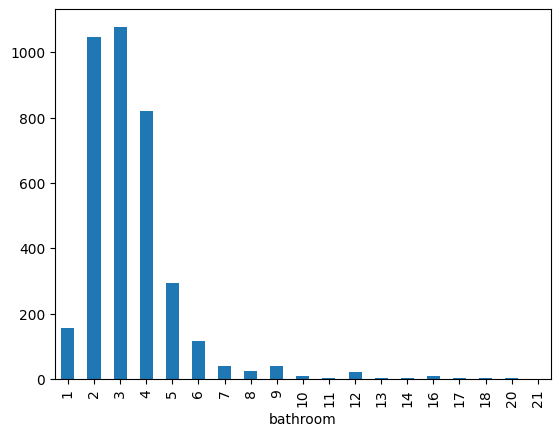

In [88]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

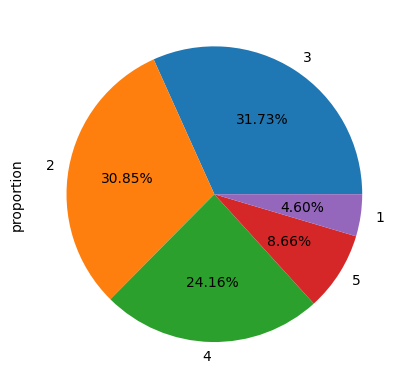

In [89]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

##  balcony ##

In [90]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

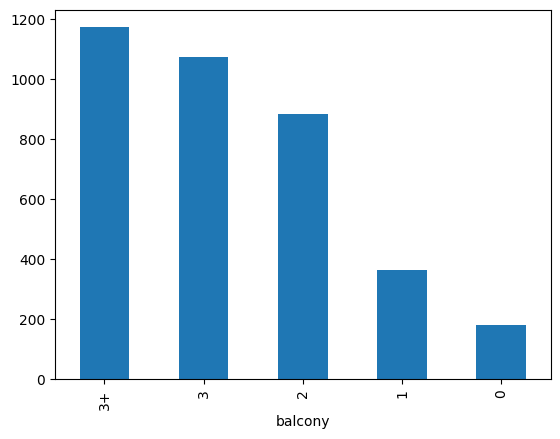

In [92]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

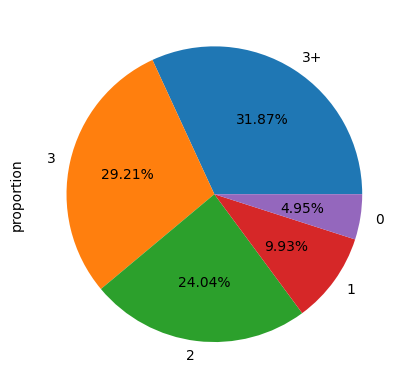

In [93]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## floar number ##

In [94]:
df['floorNum'].isnull().sum()

19

In [95]:
df['floorNum'].describe()

,floorNum
count,3658.000000
mean,6.798250
std,6.012454
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


The majority of the properties lie between the 0 to 25th floor.
 floor 1 to 4 are particularrly, with the 3rd floor being the most frequent.
 there are some flat at on the higher floor which is seems outlier 


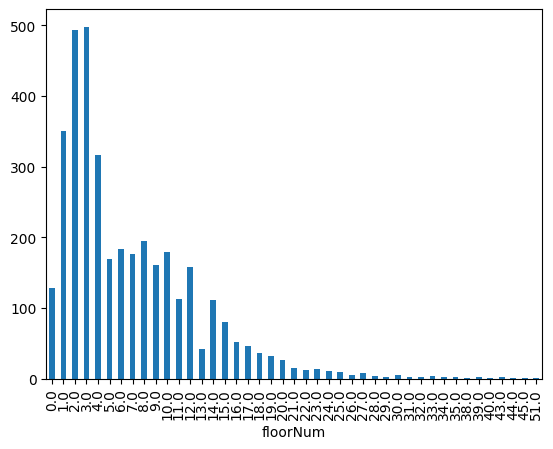

In [101]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')
print("The majority of the properties lie between the 0 to 25th floor.\n floor 1 to 4 are particularrly, with the 3rd floor being the most frequent.\n there are some flat at on the higher floor which is seems outlier ")

<Axes: ylabel='floorNum'>

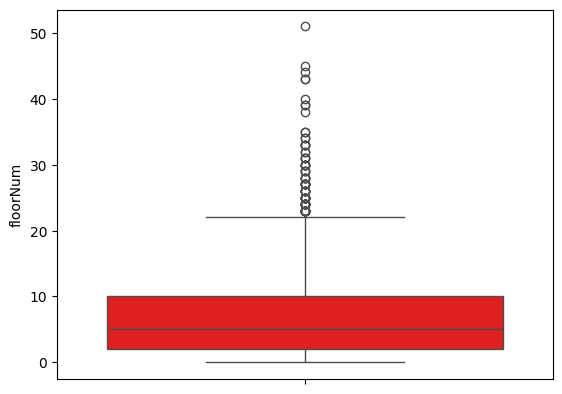

In [97]:
sns.boxplot(df['floorNum'],color='red')

## facing ##

In [102]:
df['facing'].isnull().sum()

1045

In [103]:
df['facing'].fillna('NA', inplace=True)

In [104]:
df['facing'].value_counts()

,count
facing,
NA,1045
North-East,623
East,623
North,387
West,249
South,231
North-West,193
South-East,173
South-West,153


## agePossession ##

In [105]:
df['agePossession'].isnull().sum()

0

In [107]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1646
New Property,593
Moderately Old,563
Undefined,306
Old Property,303
Under Construction,266


In [110]:
df['agePossession'].describe()

,agePossession
count,3677
unique,6
top,Relatively New
freq,1646


<Axes: xlabel='agePossession'>

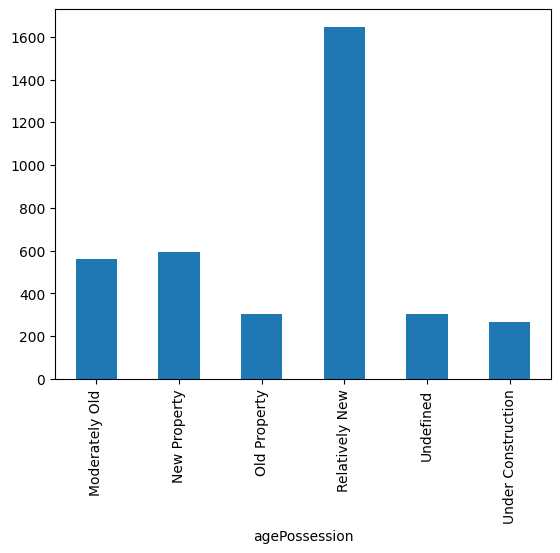

In [108]:
df['agePossession'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

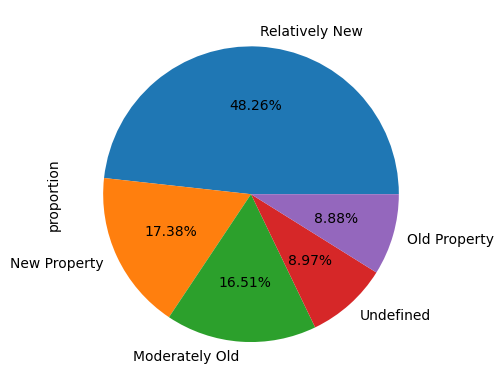

In [109]:
df['agePossession'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [111]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8


## Additional rooms ##

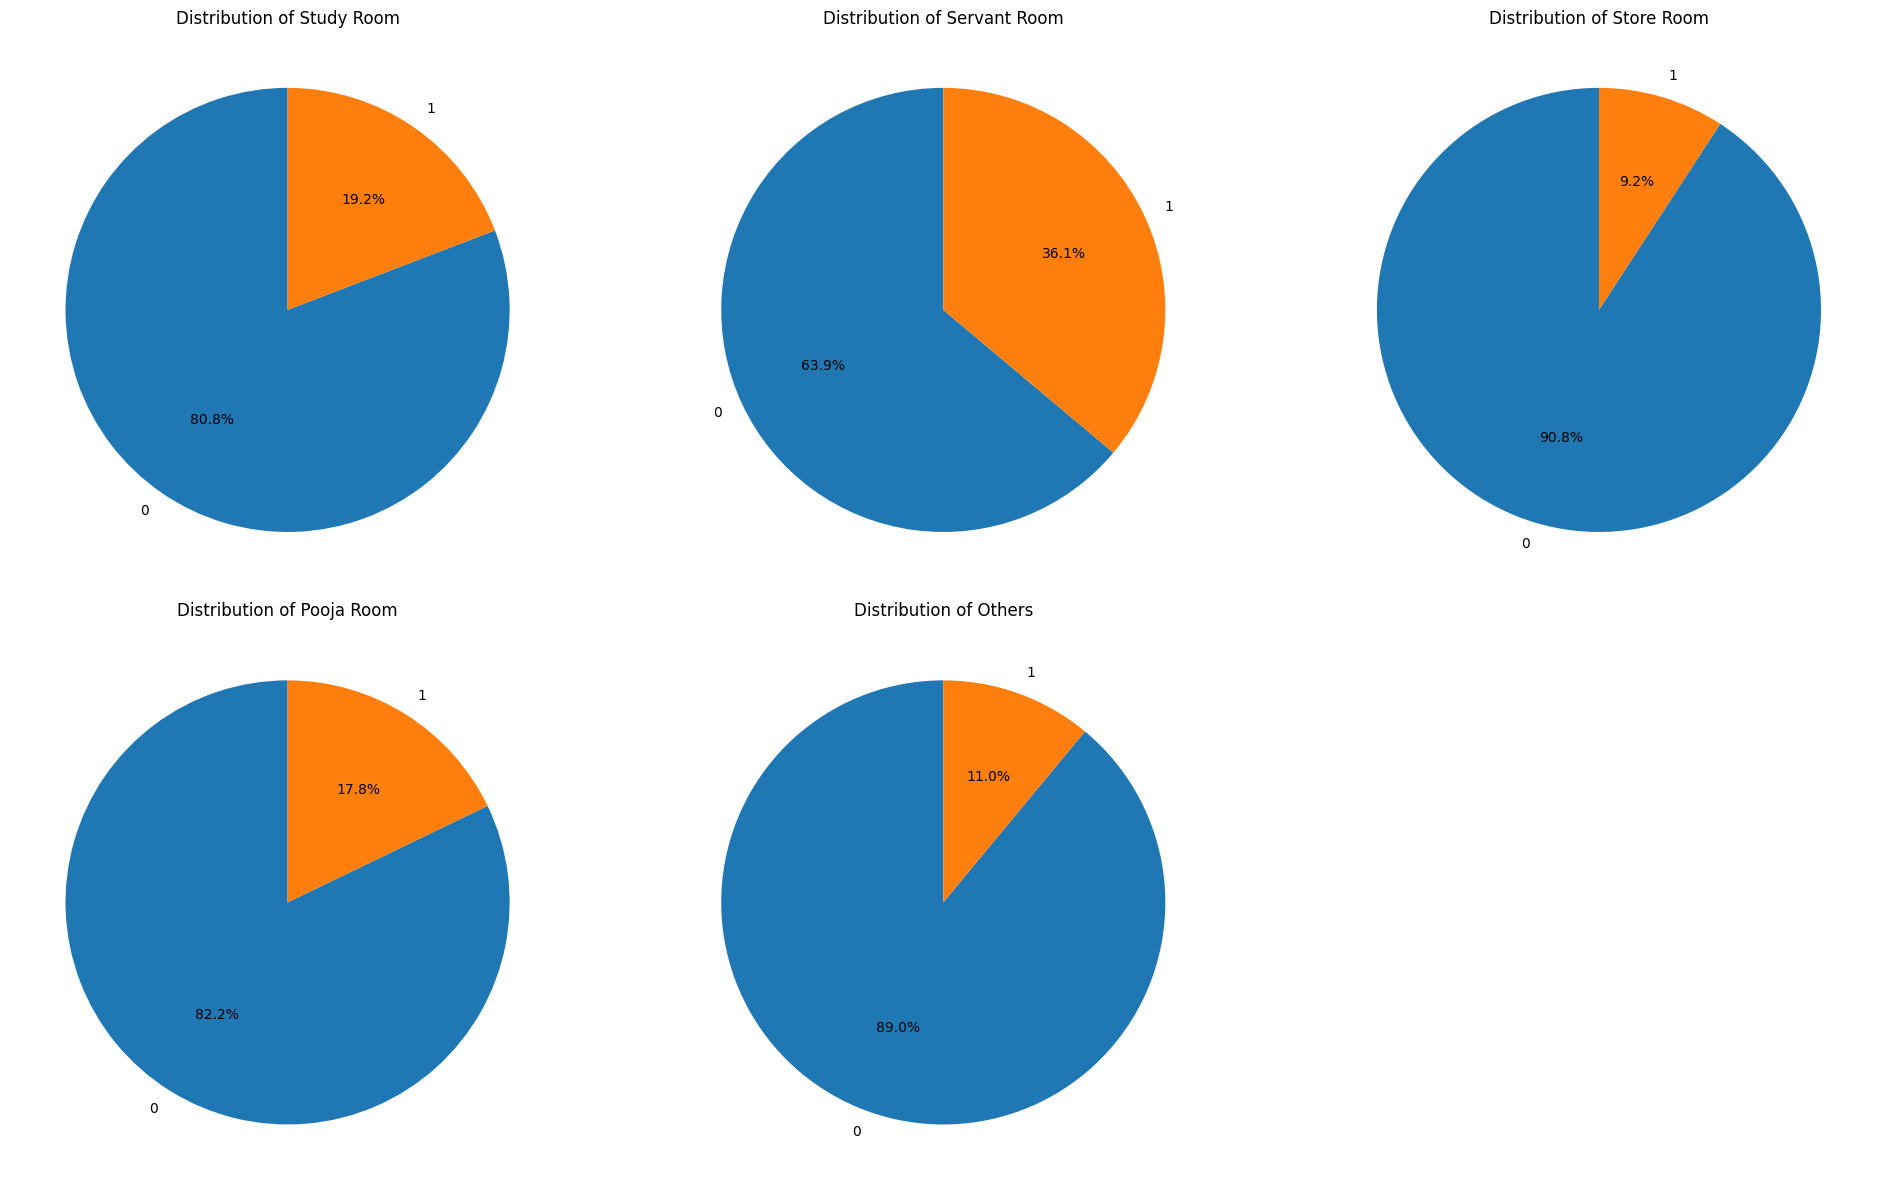

In [116]:
plt.figure(figsize=(20, 12))

#creating a subplot of pie for each rooms type
for idx, room in enumerate(['study room', 'servant room', 'store room','pooja room', 'others'],1):
  ax = plt.subplot(2,3,idx)
  df[room].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90, ax=ax)
  plt.title(f'Distribution of {room.title()}')
  plt.ylabel('')
plt.tight_layout()
plt.show()

## Furnishing type ##

In [118]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
0,2411
1,1059
2,207


<Axes: xlabel='furnishing_type'>

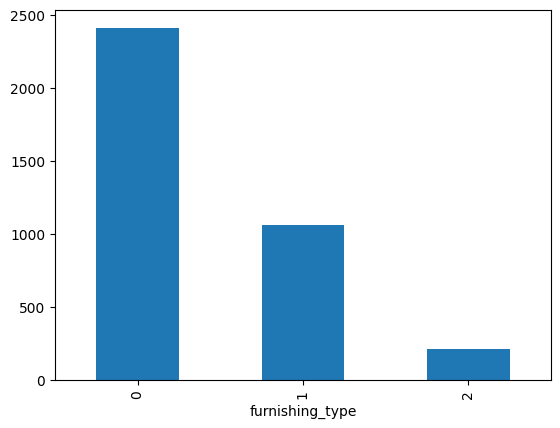

In [119]:
df['furnishing_type'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

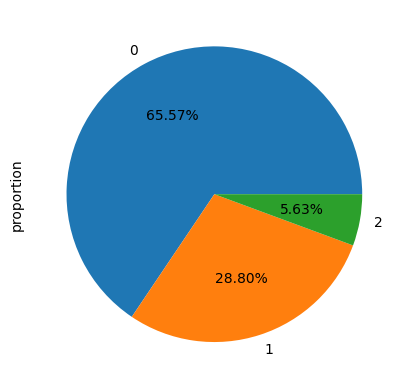

In [120]:
df['furnishing_type'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# Luxury component #

In [121]:
df['luxury_score'].isnull().sum()

0

In [122]:
df['luxury_score'].describe()

,luxury_score
count,3677.000000
mean,71.512918
std,53.059082
min,0.000000
25%,31.000000
50%,59.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

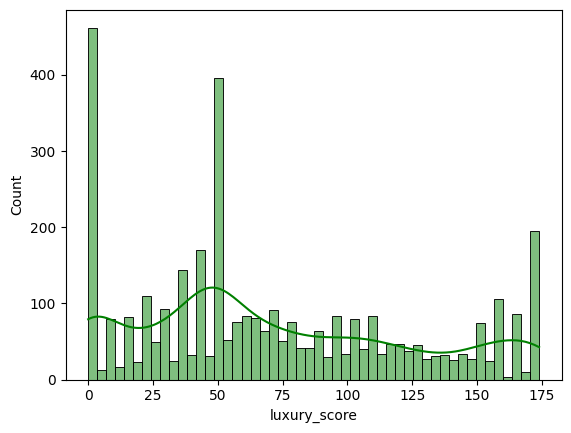

In [123]:
sns.histplot(df['luxury_score'], kde = True, bins = 50, color='green')

<Axes: ylabel='luxury_score'>

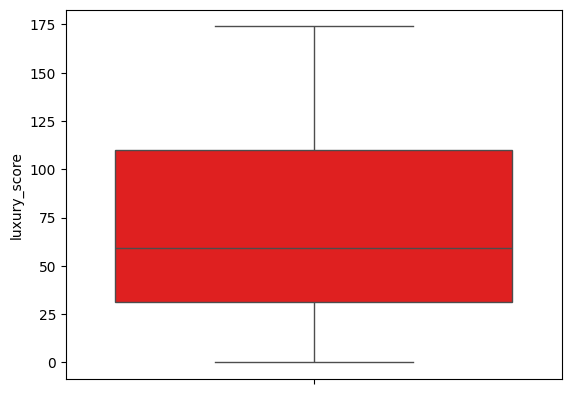

In [125]:
sns.boxplot(df['luxury_score'], color='red')